# Linear Regression with Polynomial Basis Expansion


### First task

The first task is to have a go a coding up a polynomial basis expansion for simple linear regression from scratch, you can try different degree polynomials to find the best fitting model on some synthetic data.

### Second task

The second task is to try and come up with the best fitting model for the white wine dataset which we used a few weeks ago.First you need to create a new directory called ```data``` which we will use to store the data. In the command line run:

```mkdir data```

Download the pickle file ```winequality-white.pickle``` and save it in this new data folder.

I have given you some starter code so that you can use polynomial basis expansion and L1 or L2 regularization, everything in this part should be implemented with scitkit-learn. If you want you can try more advanced regression techniques available in scikit-learn. Although, remember the goal is to find the model that has the best accuracy on the test data set not the training data set.

For more details about scikit-learn see : (https://scikit-learn.org/stable/)

# Polynomial features with numpy

In [1]:
# all the imports we need (DONT CHANGE THIS CODE!)
import matplotlib.pyplot as plt
import _pickle as cp
import numpy as np
from numpy.linalg import inv
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Simulated Data (DONT CHANGE THIS CODE!)
np.random.seed(1)
N = 10
f = lambda x: (x-0.5)*(x-1.0)*(x-2.5)*(x-4.0)
x = np.random.uniform(0.0, 5.0, size=(N,))
#x = np.linspace(0.0, 5.0, num=N)
y = f(x) + np.random.randn(N)*0.2

In [3]:
# The data points are stored in the numpy arrays x and y (DONT CHANGE THIS CODE!)
print(x)
print(y)

[2.08511002e+00 3.60162247e+00 5.71874087e-04 1.51166286e+00
 7.33779454e-01 4.61692974e-01 9.31301057e-01 1.72780364e+00
 1.98383737e+00 2.69408367e+00]
[ 1.71546336 -3.69352598  5.05337774  1.22314245 -0.0666147  -0.26330669
 -0.2071179   1.49108331  1.74597763 -1.16206824]


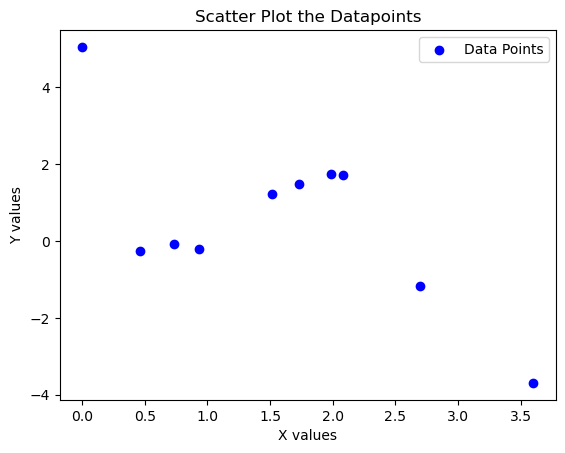

In [4]:
# remeber we are trying to predict y given x, let's plot the datapoints out (DONT CHANGE THIS CODE!)
plt.scatter(x, y, color='blue', label='Data Points') 
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot the Datapoints')
plt.legend()

### Now it's your turn

Now it is up, first you need to transform the data matrix to include the bias term $[1, ..., 1]$ the datapoints $[x_1, x_2, ..., x_N]$ and the polynomial features: $[x^2_1, ..., x^2_N]$, $[x^3_1, ..., x^3_N]$, ..., $[x^p_1, ..., x^p_N]$

### Some helper functions

These functions should be all you need to create the polynomial feature matrix

In [5]:
# create an an array of all zeros
print(np.ones(5, dtype=np.float64))

[1. 1. 1. 1. 1.]


In [6]:
# elementwise square of an array - this works for python lists and numpy arrays
print(np.power([0.1, 2.0, 3.0, -2.0], 2))
# you can also use **2 notation for numpy arrays (THIS WON"T WORK FOR PYTHON LISTS) - DONT USE ^2 this is a common mistake
a = np.array([0.1, 2.0, 3.0, -2.0])
print(a**2)

[0.01 4.   9.   4.  ]
[0.01 4.   9.   4.  ]


In [7]:
# stack two or more arrays together
a = np.array([0.1, 2.0, 3.0, -2.0])
b = np.array([0.3, -3.0, 6.0, -0.5])
c = np.array([-0.7, 3.0, 0.1, 0.3])
print(np.stack([a,b], axis=1))
print(np.stack([a,b,c], axis=1))

[[ 0.1  0.3]
 [ 2.  -3. ]
 [ 3.   6. ]
 [-2.  -0.5]]
[[ 0.1  0.3 -0.7]
 [ 2.  -3.   3. ]
 [ 3.   6.   0.1]
 [-2.  -0.5  0.3]]


In [8]:
# now you need to create the X data matrix with polynomial features

# degree of the polynomial
p = 4

# construct the new data matrix with polynomial features
X = np.stack([np.power(x, i) for i in range(0, p+1)], axis=1)

# the shape of the new data matrix should be (N, p+1)
assert X.shape == (N, p+1)

N, D = X.shape

print(f'data matrix has {N} data points, with {D} features')

data matrix has 10 data points, with 5 features


### Now it's your turn [Exercise]

Now it is up to you to derive the least squares estimate for the data matrix ```X``` and ```y``` using only numpy commands (we did this a few weeks ago you can re-use your code).

- To invert a matrix use ```inv(matrix)```
- To multiple two matrices together use ```np.matmul(matrix_1, matrix_2)```
- To transpose a matrix use ```np.transpose(matrix)``` or ```matrix.transpose()```

In [9]:
# your code goes here

l2_coef= 1e-8

X_T = np.transpose(X)

X_T_X = np.matmul(X_T, X)

X_T_X_inv = inv(X_T_X + l2_coef * np.eye(D))

weights = np.matmul(np.matmul(X_T_X_inv, X_T), y)

assert weights.shape == (p+1,)

In [10]:
# print out the weights of the model 
print(weights)

[  5.03034396 -19.12633194  21.62948849  -8.63504507   1.08759295]


In [11]:
# Let's compute the mean squared error of this model (DONT CHANGE THIS CODE!)
y_hat = np.polyval(np.flip(weights), x)
mse = ((y - y_hat)**2).mean()
print(f"You model has mean squared error {mse}, can you do better?")

You model has mean squared error 0.03868451063344312, can you do better?


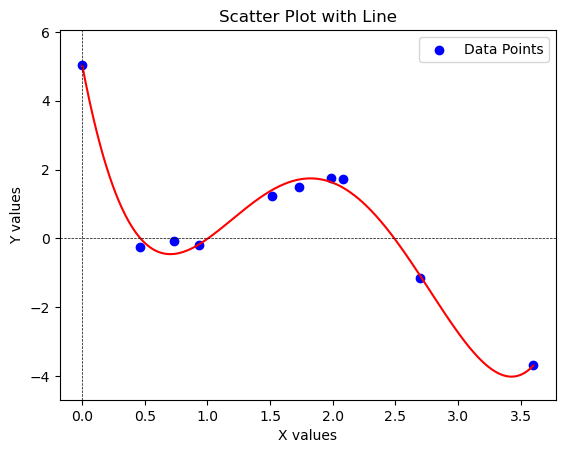

In [12]:
# Plotting the result - let's see how well your line fits the data (DONT CHANGE THIS CODE!)
plt.scatter(x, y, color='blue', label='Data Points')
x_line = np.linspace(min(x), max(x), 1000)  # Generate 100 points along x for the line
y_line = np.polyval(np.flip(weights), x_line)
plt.plot(x_line, y_line, color='red')  # Line plot

plt.xlabel('X values')
plt.ylabel('Y values')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # x-axis
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # y-axis
plt.title('Scatter Plot with Line')

plt.ylim(min(y)-1, max(y)+1) 

plt.legend()

# Task 2 - polynomial features with scikit-learn

### Loading in the data

First we load in the data (feature) matrix ```X``` and the data (output) vector ```y```.

In [13]:
# load the full dataset (DONT CHANGE THIS CODE!)
# data matrix X and data vector y
X, y = cp.load(open('data/winequality-white.pickle', 'rb'))
# print the shape of the dataset
print(f'data matrix shape {X.shape}', f'data vector shape {y.shape}')

data matrix shape (4898, 11) data vector shape (4898,)


### Data preprocessing

First we need to do some simple data preprocessing. Remember we need to add a column of all ones to model the bias vector giving us a data matrix with shape N, D+1

In [14]:
# N refers to the number of datapoints, D refers to the dimension of each datapoint (how many features it has)
N, D = X.shape

# (DONT CHANGE THIS CODE!) this line adds a column of all ones to the front of the data matrix
print(f'data matrix has {N} data points, with {D} features')
X = np.concatenate([np.ones(N).reshape(-1,1), X], axis=1)

N, D = X.shape
print(f'data matrix has {N} data points, with {D} features')

# The first column of X is now entire ones, uncomment the following print statement to see.
#print(X[:,0])

data matrix has 4898 data points, with 11 features
data matrix has 4898 data points, with 12 features


In [15]:
# N refers to the number of datapoints, D refers to the dimension of each datapoint (how many features it has)
N, D = X.shape

# split the data set into 80% train and 20% test data (DONT CHANGE THIS CODE!)
N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

### Using scikit-learn

Like before we can use scikit-learn to do multiple linear regression for us under the hood.

Have a play around with lasso (L1) and ridge (L2) regression and the corresponding lambda/alpha hyperparameter which weights the regularization, what happens if you set alpha = 100? What do the weights look like? What is the best configuration that you found?

In [16]:
# standard linear regression without regularization
reg = linear_model.LinearRegression()

# linear regression with L1 regularization
reg = linear_model.Lasso(alpha=0.1)

# linear regression with L2 regularization
reg = linear_model.Ridge(alpha=0.1)

# fit a linear model to the training data
reg.fit(X_train, y_train)

# scikit learn stores the feature weights and bias (y-intercept) in different attributes
# we just need to reconcile them into one vector
weights = np.array(reg.coef_)
weights[0] = np.array(reg.intercept_)

# compute the y hat estimates for the train data 
y_hat_train = np.matmul(X_train, weights)
# compute the y hat estimates for the test data
y_hat_test = np.matmul(X_test, weights)

# compute the training dataset error
train_mse = ((y_train - y_hat_train)**2).mean()
# compute the test dataset error
test_mse = ((y_test - y_hat_test)**2).mean()

# print out the train and test error to see if the model has overfit or not
print("Train Error (MSE): {:.4f}, Test Error (MSE): {:.4f}".format(train_mse, test_mse))

Train Error (MSE): 0.5712, Test Error (MSE): 0.5669


### Optional extra [Exercise]

Now try using polynomial features from scikit-learn.

Can you get a better train and test error than standard multiple linear regression? Play around with the degree of the polynomial ```p``` don't make it too large! Also have a play around with Lasso (L1) and Ridge (L2) regression, this might improve things even more!!

See (https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for extra details.

In [29]:
p = 2 # degree of the polynomial
poly = PolynomialFeatures(p)

# transform the train and test data matrix with polynomial features
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

# print out how many features we now have
N, D = poly_X_train.shape
print(f'data matrix has {N} data points, with {D} features')

# standard linear regression without regularization
reg = linear_model.LinearRegression()

# linear regression with L1 regularization
reg = linear_model.Ridge(alpha=0.1)

# fit a linear model to the training data
reg.fit(poly_X_train, y_train)

# scikit learn stores the feature weights and bias (y-intercept) in different attributes
# we just need to reconcile them into one vector
weights = np.array(reg.coef_)
weights[0] = np.array(reg.intercept_)

# compute the y hat estimates for the train data 
y_hat_train = np.matmul(poly_X_train, weights)
# compute the y hat estimates for the test data
y_hat_test = np.matmul(poly_X_test, weights)

# compute the training dataset error
train_mse = ((y_train - y_hat_train)**2).mean()
# compute the test dataset error
test_mse = ((y_test - y_hat_test)**2).mean()

# print out the train and test error to see if the model has overfit or not
print("Train Error (MSE): {:.4f}, Test Error (MSE): {:.4f}".format(train_mse, test_mse))

data matrix has 3918 data points, with 91 features
Train Error (MSE): 0.5056, Test Error (MSE): 0.5186
